In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv


In [2]:
data = pd.read_csv("/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv")
data.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN


In [3]:
close = data['close']

# KALMAN FILTER IMPLEMENTATION

In [4]:
from pykalman import KalmanFilter
kf = KalmanFilter(
observation_matrices = [1],
initial_state_mean = 0,
initial_state_covariance = 1,
observation_covariance=1,
transition_covariance=.01)

In [5]:
state_means,_= kf.filter(close)
print(state_means)

[[ 57.        ]
 [ 75.27218543]
 [ 85.21319837]
 ...
 [222.81464604]
 [222.603978  ]
 [222.68921203]]


In [6]:
state_means_d = pd.DataFrame(state_means)
# print(state_means_d)   

data['Kalman_Filter']= state_means_d
data.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Kalman_Filter
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN,57.000000
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN,75.272185
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN,85.213198
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN,90.822281
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN,93.953821


<AxesSubplot:>

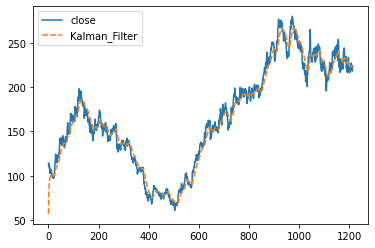

In [7]:
import seaborn as sns

sns.lineplot(data=data[['close','Kalman_Filter']])
# Kalman Filter vs Close Price 

# COMPARISON OF CLOSE PRICE WITH KALMAN FILTER AND MOVING AVERAGE (3 DAY WINDOW)

In [8]:
arr = data['close']

window_size = 3
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o

#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1


# We add 0 to counteract the missing values of the first two values
a = [0,0]
n_moving_averages = a + moving_averages
print(n_moving_averages)


[0, 0, 112.97, 112.22, 111.22, 109.8, 107.03, 105.15, 103.38, 104.15, 105.47, 106.32, 105.92, 104.95, 102.75, 101.2, 99.53, 99.23, 98.88, 98.5, 97.95, 97.48, 97.97, 98.22, 100.85, 103.12, 108.18, 111.65, 116.72, 120.37, 122.43, 121.3, 118.03, 115.93, 115.2, 115.23, 116.7, 118.18, 121.07, 121.45, 122.1, 121.18, 122.58, 123.85, 127.23, 132.68, 136.95, 138.65, 137.12, 136.93, 137.38, 139.3, 140.92, 142.03, 139.08, 136.73, 136.98, 140.13, 143.27, 144.5, 144.58, 143.38, 140.73, 137.58, 134.38, 134.95, 136.42, 137.6, 136.88, 138.68, 141.42, 143.23, 142.27, 140.63, 140.3, 143.92, 149.82, 155.98, 157.0, 155.62, 151.42, 149.6, 147.98, 148.72, 148.17, 149.12, 151.08, 155.32, 161.92, 166.6, 169.57, 169.53, 167.33, 167.22, 164.75, 164.27, 162.07, 163.55, 165.73, 166.12, 165.62, 165.3, 166.27, 166.25, 164.28, 163.45, 166.78, 172.57, 175.75, 175.08, 173.83, 172.25, 171.35, 171.93, 171.18, 172.13, 171.62, 176.8, 181.88, 185.18, 185.7, 185.57, 188.62, 193.33, 194.52, 192.53, 190.73, 190.7, 189.53, 188

In [9]:
data['Moving Avg'] = n_moving_averages
data.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Kalman_Filter,Moving Avg
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN,57.000000,0.00
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN,75.272185,0.00
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN,85.213198,112.97
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN,90.822281,112.22
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN,93.953821,111.22


Text(0.5, 1.0, 'Close Price vs Kalman Filter vs Moving Average ')

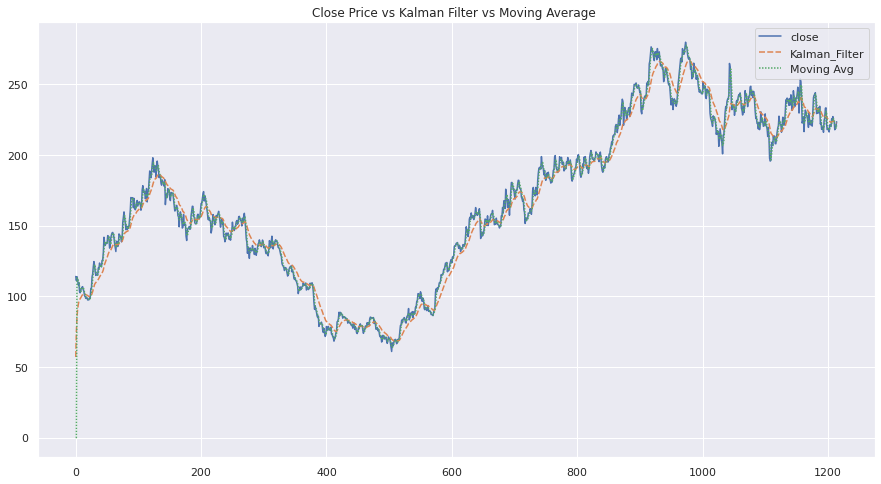

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.lineplot(data=data[['close','Kalman_Filter','Moving Avg']])
p.set_title("Close Price vs Kalman Filter vs Moving Average ")